<a href="https://colab.research.google.com/github/Amrit007-droid/OIBSIP-OasisInfobyte/blob/main/OIBSIP_TASK_2_CAR_PRICE_PREDICTION_WITH_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATA SCIENCE INTERNSHIP @ OASIS INFOBYTE

## TASK 3 - CAR PRICE PREDICTION WITH MACHINE LEARNING

# NAME :Hrushikesh Sutar

# GitHUb Link:- https://github.com/hrushi825/OASIS-INFO-TECH

### Objective:

### *Predicting the price of cars based on a wide range of attributes and features. Using a dataset containing car details such as safety ratings, dimensions, engine specifications, and more, we aim to develop a machine learning model that accurately estimates the price of different car models.*

In [1]:
#importing the necessary libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the data using pandas:
car_df = pd.read_csv("/content/drive/MyDrive/Oasis infotech/Car Prediction/car data.csv")
car_df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
# Checking the dimensions of the dataset -
car_df.shape

(301, 9)

In [ ]:
# Viewing the first 10 rows -
car_df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [ ]:
# Viewing the last 10 rows -
car_df.tail(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0


In [ ]:
# Making a concise summary of the dataset--
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#Checking for nullvalues :
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

### *This dataset contains no null values ie all the columns have values.*

In [ ]:
#Checking for duplicate data:
car_df.duplicated().sum()

2

### *The output '2' indicates that there are two duplicate rows in the DataFrame 'car_df'*

In [ ]:
# Dropping the duplicate values:
car_df = car_df.drop_duplicates()

In [ ]:
car_df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
# Checking the datatypes:
car_df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [ ]:
# Check the number of unique values of each column
car_df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [ ]:
# Renaming 'Selling_type' column to 'Seller_Type' for a better understanding :
car_df.rename(columns = {'Selling_type':'Seller_Type'}, inplace = True)

In [ ]:
car_df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [ ]:
# Statistical analysis of the data -
car_df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
# checking the distribution of categorical data

print(car_df.Fuel_Type.value_counts())
print()
print(car_df.Seller_Type.value_counts())
print()
print(car_df.Transmission.value_counts())

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

Dealer        193
Individual    106
Name: Seller_Type, dtype: int64

Manual       260
Automatic     39
Name: Transmission, dtype: int64


In [ ]:
car_df.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


In [ ]:
# Encoding the 'Fuel_Type' column:
car_df.replace({'Fuel_Type': {'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace = True)

# Encoding the 'Seller_Type' column:
car_df.replace({'Seller_Type': {'Dealer':0, 'Individual':1}}, inplace = True)

# Encoding the 'Transmission' column:
car_df.replace({'Transmission': {'Manual':0, 'Automatic':1}}, inplace = True)


In [ ]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### *Creating a Heat Map*

<Axes: >

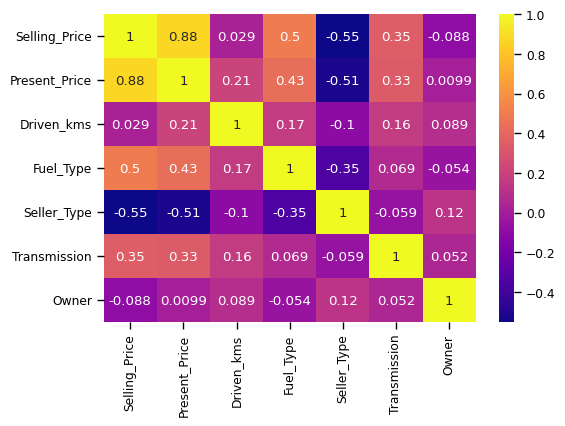

In [ ]:
map = car_df[["Selling_Price", "Present_Price", "Driven_kms", "Fuel_Type", "Seller_Type", "Transmission", "Owner"]]
map = map.corr()

plt.figure(figsize = (6,4))
sns.set_context('paper', font_scale=1)
sns.heatmap(data = map, annot = True, cmap='plasma')

### *Splitting the Data and Target*

In [ ]:
X = car_df.drop(['Car_Name', 'Selling_Price'], axis = 1)
Y = car_df['Selling_Price']

In [ ]:
X.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [ ]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### *Splitting Training and Testing data*

X train : All the training data

X test : All the testing data

Y train : All the prices of X train

Y test : All the prices of X test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

### *Model Training*

### *1. Linear Regression*

In [ ]:
# Loading the Linear Regression Model:
lin_rig_model = LinearRegression()

In [ ]:
lin_rig_model.fit(X_train, Y_train)

LinearRegression()

### *Model Evaluation*

*a) Evaluation on Training data*

In [ ]:
# Predicting on Training data:
training_data_prediction = lin_rig_model.predict(X_train)

In [ ]:
# R Squared error:
score_of_error = metrics.r2_score(Y_train, training_data_prediction)
print(f"The R square error in this case is : {score_of_error}")

The R square error in this case is : 0.8768029664697252


### *Understanding the performance of the model by Visualizing the actual and Predicted prices :*

In [ ]:
# Creating a DataFrame for plotting
plot_data = {'Actual Price': Y_train, 'Predicted Price': training_data_prediction}
df = pd.DataFrame(plot_data)

# Creating a scatter plot
fig = px.scatter(df, x='Actual Price', y='Predicted Price', color=df.index,
                 title='Actual Prices vs Predicted Prices',
                 labels={'Actual Price': 'Actual Price', 'Predicted Price': 'Predicted Price'})
fig.show()


### *It is observed that the values produced by our Machine Learning model are very close to our original sold prices.*

*b) Evaluating on Testing data*

In [ ]:
# Predicting on Testing data:
test_data_prediction = lin_rig_model.predict(X_test)

In [ ]:
# R Squared Error:
score_of_error = metrics.r2_score(Y_test, test_data_prediction)
print(f"The R Squared error in this case is: {score_of_error}")

The R Squared error in this case is: 0.8561865067080684


### *Visualizing the Model*

In [ ]:
# Creating a DataFrame for plotting
plot_data_test = {'Actual Price': Y_test, 'Predicted Price': test_data_prediction}
df_test = pd.DataFrame(plot_data_test)

# Creating a scatter plot
fig_test = px.scatter(df_test, x='Actual Price', y='Predicted Price', color=df_test.index,
                      title='Actual Prices vs Predicted Prices (Test Set)',
                      labels={'Actual Price': 'Actual Price', 'Predicted Price': 'Predicted Price'})
fig_test.show()


### *2. Lasso Regression*

In [ ]:
#Loading the Lasso regression model:
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

### *Model Evaluation*

*a) Evaluating on training data*

In [ ]:
training_data_prediction = lass_reg_model.predict(X_train)

In [ ]:
# R Squared Error-
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(f"The R Squared Error in this case is : {error_score}")


The R Squared Error in this case is : 0.8424619334154677


### *Visualizing the model based on Training Data*

In [ ]:
# Creating a DataFrame for plotting
plot_data = {'Actual Price': Y_train, 'Predicted Price': training_data_prediction}
df = pd.DataFrame(plot_data)

# Creating a scatter plot
fig = px.scatter(df, x='Actual Price', y='Predicted Price', color=df.index,
                 title='Actual Prices vs Predicted Prices',
                 labels={'Actual Price': 'Actual Price', 'Predicted Price': 'Predicted Price'})
fig.show()

*b) Evaluating on Testing Data:*

In [ ]:
# Predicting on Testing data:
test_data_prediction = lass_reg_model.predict(X_test)

In [ ]:
# R Squared Error:
error = metrics.r2_score(Y_test, test_data_prediction)
print(f"The R Squared error in this case is: {error}")

The R Squared error in this case is: 0.7931955660079392


### *Visualizing the model based on Testing Data-*

In [ ]:
# Creating a DataFrame for plotting
plot_data = {'Actual Price': Y_train, 'Predicted Price': training_data_prediction}
df = pd.DataFrame(plot_data)

# Creating a scatter plot
fig = px.scatter(df, x='Actual Price', y='Predicted Price', color=df.index,
                 title='Actual Prices vs Predicted Prices',
                 labels={'Actual Price': 'Actual Price', 'Predicted Price': 'Predicted Price'})
fig.show()

### *Performance Comparison: Linear Regression vs. Lasso Regression*

*Upon evaluation, it's noteworthy that the Linear Regression model demonstrated superior performance compared to the Lasso Regression model in predicting car prices.*

*The Linear Regression model showcased a robust ability to capture the underlying patterns within the data, resulting in more accurate predictions.*


# ***Thank You...***